In [195]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [196]:
# importando os dados e gerando uma visão sumarizada com head

In [197]:
data = pd.read_csv("dataset/unlabeled_data.txt", sep=" ", header=None)
data.head()

,0,1
0,0.655841,0.578695
1,0.873236,1.019299
2,0.844976,0.963878
3,0.947335,1.120076
4,0.759039,0.853813


In [198]:
data.shape

(420, 2)

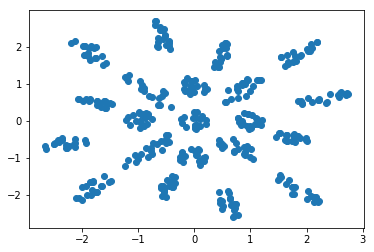

In [199]:
plt.scatter(data.iloc[:, 0].values, data.iloc[:,1].values)
plt.show()

In [200]:
# Inicializando o K-means utilizando 8 clusters 
# e o método de inicialização random que irá selecionar os centroides de forma aleatória.

In [201]:
kmeans = KMeans(n_clusters = 8, init = 'random')

In [202]:
# Executando o método fit() para agrupar os dados

In [203]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [204]:
# Verificando os centroides gerados

In [205]:
kmeans.cluster_centers_

array([[-1.20341651,  1.96044443],
       [-0.5055168 ,  0.05076708],
       [ 0.44104705,  1.19231085],
       [ 2.09137412,  1.19940323],
       [ 1.15271588, -0.40398705],
       [-2.01765503, -0.06040927],
       [-0.8398935 , -1.46055241],
       [ 1.23931208, -2.06587929]])

In [206]:
# Tabela de distâncias
# Cada instância contém três valores, e cada valor corresponde exatamente a distância 
# entre a instância de dados corrente e cada um dos três clusters

In [207]:
distance = kmeans.fit_transform(data)
distance

array([[ 1.08334432,  1.25227948,  3.23597803, ...,  1.02469804,
         1.60791287,  2.06944534],
       [ 1.43275906,  0.91154766,  3.6697573 , ...,  1.38227184,
         1.36027698,  2.55948198],
       [ 1.38427606,  0.94806091,  3.61365565, ...,  1.33179904,
         1.38370787,  2.4973568 ],
       ..., 
       [ 1.92652239,  3.25186764,  4.14507894, ...,  3.42340333,
         4.61752426,  2.5852509 ],
       [ 2.10185705,  3.36905508,  4.34718867, ...,  3.62335239,
         4.79015869,  2.79326818],
       [ 1.70071321,  3.11582863,  3.85392791, ...,  3.14615764,
         4.38686502,  2.28711807]])

In [208]:
# labels para cada instância, ou seja, o código do cluster que a instância de dados foi atribuído

In [209]:
labels = kmeans.labels_
labels

array([5, 1, 1, 1, 1, 0, 1, 1, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7,
       7, 2, 7, 7, 5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 5, 5, 4, 4, 5, 4, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6,

In [210]:
# Utilizando o método Elbow para encontrar o valor ideal do parâmetro k
# Podemos ver que a partir do número de 8 clusters não temos uma diminuição tão expressiva

1 1456.11116843
2 946.074057364
3 601.811501134
4 433.39211795
5 351.177779933
6 285.245742974
7 230.523682984
8 194.134278166
9 157.826054376
10 139.52532989


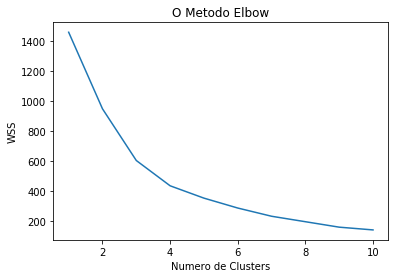

In [211]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(data)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [212]:
# Representação gráfica dos dados e centróides

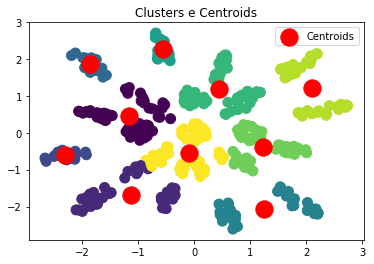

In [213]:
plt.scatter(data.iloc[:, 0].values, data.iloc[:,1].values, s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Clusters e Centroids')

plt.legend()
 
plt.show()
